https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb


# Tutorial 3: End to End Machine Learning  

## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [ ]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

In [ ]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Download the Data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/housing/"

In [6]:
walmart = pd.read_csv(r"C:\Users\DELL\Downloads\walmart-sales-dataset-of-45stores.csv")
#walmart
walmart.head(10)
    

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


`load_housing_data` function loads the `housing.csv` into a panda `dataframe`

## A Quick Look at the Data Structure

Each row represents one district.

In [8]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


All attributes are numerical, except the ocean_proximity field.

In [11]:
walmart.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640).

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

# Create a Test Set 
The test data will be used in later P3 to test the classifier

Pick some instances randomly (typically 20% of the dataset)

In [12]:
# to make this notebook's output identical at every run
np.random.seed(42)

## How slicing works in Python

In [13]:
firstList = [1,2,3,4]
a= firstList[1:3]
b= firstList[:3] #Exclusive on the left
c= firstList[2:] #Inclusive on the left
print(a)
print(b)
print(c)

[2, 3]
[1, 2, 3]
[3, 4]


In [14]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = split_train_test(walmart, 0.2)
len(train_set)

5148

In [18]:
len(test_set)

1287

if you run the program again, it will generate a different test set! 

One solution is to save the test set on the first run and then load it in subsequent runs. 
Another option is to set the random number generator’s seed (e.g., with np.random.seed(42))14 before calling np.random.permutation() so that it always generates the same shuffled indices.

**But both these solutions will break the next time you fetch an updated dataset.**

##  Scikit-Learn Train Test Split

`train_test_split` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html">Documentation Link</a>


In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(walmart, test_size=0.2, random_state=42)

In [26]:
test_set.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2436,18,12-03-2010,1138800.32,0,42.39,2.805,131.784000,9.202
3361,24,24-06-2011,1304850.67,0,68.88,3.964,135.265267,8.212
233,2,28-10-2011,1769296.25,0,65.87,3.372,217.325182,7.441
3667,26,11-11-2011,1077640.13,0,40.08,3.570,136.461806,7.598
5011,36,19-03-2010,428851.99,0,59.56,2.701,209.980321,8.554


<AxesSubplot:>

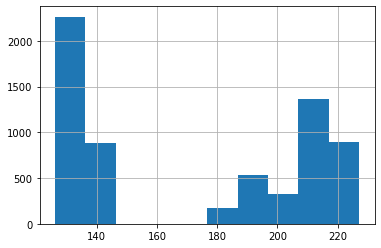

In [45]:
walmart["CPI"].hist()

In [52]:
walmart["income_cat"] = pd.cut(walmart["Unemployment"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [53]:
walmart["income_cat"].value_counts()

5    5813
4     480
3     142
1       0
2       0
Name: income_cat, dtype: int64

<AxesSubplot:>

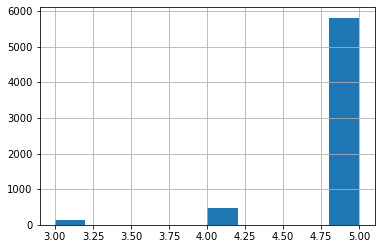

In [54]:
walmart["income_cat"].hist()

<AxesSubplot:>

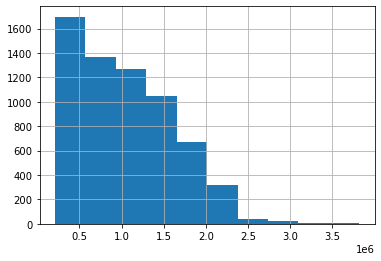

In [55]:
walmart["Weekly_Sales"].hist()

In [56]:
walmart["income_cat1"] = pd.cut(walmart["Weekly_Sales"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [57]:
walmart["income_cat1"].value_counts()

5    6435
1       0
2       0
3       0
4       0
Name: income_cat1, dtype: int64

<AxesSubplot:>

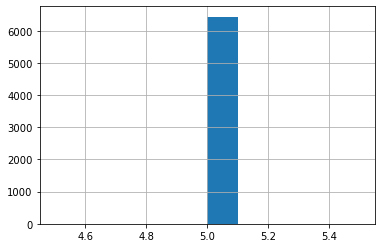

In [58]:
walmart["income_cat1"].hist()

stratified sampling based on the income category, to generate the test set with  income category proportions almost identical to those in the full dataset

`StratifiedShuffleSplit` <- Important to learn <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html">Documentation Link</a>

In [38]:
#Provides train/test indices to split data in train/test sets.
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [40]:
for train_index, test_index in split.split(walmart, walmart["income_cat"]):
    strat_train_set = walmart.loc[train_index]
    strat_test_set = walmart.loc[test_index]
    

In [41]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.708625
2    0.291375
1    0.000000
4    0.000000
5    0.000000
Name: income_cat, dtype: float64

In [44]:
walmart["income_cat"].value_counts() / len(walmart)

3    0.708936
2    0.291064
1    0.000000
4    0.000000
5    0.000000
Name: income_cat, dtype: float64

In [60]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(walmart, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(walmart),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [61]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.000000,0.000000,0.000000,NaN,NaN
2,0.000000,0.291375,0.000000,NaN,inf
3,0.022067,0.708625,0.024864,12.676056,3111.267606
4,0.074592,0.000000,0.064491,-13.541667,-100.000000
5,0.903341,0.000000,0.910645,0.808533,-100.000000


In [62]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)